# Detecting Vehicular Insurance Fraud with Unsupervised Learning

### Github: [https://github.com/rrgrs/vehicular-insurance-fraud-detection](https://github.com/rrgrs/vehicular-insurance-fraud-detection)

## Dataset Overview

The Kaggle Vehicle Insurance Claim Fraud Detection dataset comprises 15,420 entries, each described by 33 features, encapsulating a broad spectrum of information pertinent to vehicle insurance claims. This rich dataset includes both numerical and categorical variables, such as the month and day of the week when the claim was made, demographic details of the claimant (e.g., age, sex, marital status), specifics about the vehicle and accident (e.g., make, accident area, vehicle price), and details pertaining to the insurance policy (e.g., policy type, number, and deductibles). A critical column, `FraudFound_P`, serves as a binary indicator of whether fraud was detected in the claim, providing a foundation for exploring patterns and anomalies related to fraudulent activities within the dataset. This diverse compilation of features offers a comprehensive view into the dynamics of insurance claims, presenting a fertile ground for applying machine learning models to detect fraudulent cases, understand customer behavior, and optimize insurance operations.

## Project Objective

The objective of this unsupervised learning project is to unearth patterns and anomalies in vehicular insurance claims that could indicate fraudulent activities, leveraging the comprehensive Kaggle Vehicle Insurance Claim Fraud Detection dataset. By applying advanced clustering and anomaly detection techniques, the project aims to identify subtle correlations and characteristics among claims that distinguish fraudulent cases from legitimate ones, without relying on predefined fraud labels for training. This exploratory approach not only seeks to enhance the detection and prevention of insurance fraud but also aims to provide insurers with deep insights into claim patterns, potentially informing more effective risk assessment, claim processing strategies, and policy adjustments. Through meticulous data analysis and model development, the project endeavors to contribute significantly to the efficiency and integrity of insurance operations, ultimately fostering a more secure and trustworthy insurance landscape.

## Project Plan

### Part 1: Exploratory Data Analysis, Data Cleaning, and Preprocessing

- **Exploratory Data Analysis (EDA)**
  - Visualize distribution of numerical features to understand the spread and identify outliers.
  - Plot count plots for categorical features to gauge the distribution and identify any imbalance.
  - Perform correlation analysis to uncover potential relationships between features.

- **Data Cleaning**
  - Check for and handle missing values, if any, through imputation or removal, depending on their significance and volume.
  - Identify and treat outliers in the dataset, considering capping, transformation, or removal to mitigate their impact on the model.

- **Preprocessing**
  - Encode categorical variables using One-Hot Encoding or Label Encoding to convert them into a machine-readable format.
  - Apply feature scaling (standardization or normalization) to ensure that all numerical features contribute equally to the analysis.
  - Consider dimensionality reduction techniques, like PCA, to reduce the feature space and improve model efficiency, if necessary.

### Part 2: Model Training and Feature Selection

- **Model Training**
  - Experiment with different clustering algorithms (e.g., K-Means, DBSCAN, and hierarchical clustering) and anomaly detection methods (e.g., Isolation Forest, Local Outlier Factor) to identify patterns and outliers.
  - Determine the optimal number of clusters (for clustering algorithms) through methods such as the elbow method or silhouette score.

- **Feature Selection**
  - Utilize feature importance scores from algorithms (where applicable) or conduct iterative testing to identify the most relevant features for clustering and anomaly detection.
  - Evaluate the impact of removing or adding features on the model's ability to discern patterns and detect anomalies.

### Part 3: Model Comparison and Evaluation

- **Model Comparison**
  - Compare models based on their ability to form meaningful clusters or detect anomalies, using metrics appropriate to unsupervised learning, such as silhouette scores for clustering.
  - Assess the practicality of the clusters formed or anomalies detected in the context of fraud detection.

- **Evaluation**
  - Utilize internal evaluation metrics and domain knowledge to validate the effectiveness of the clustering or anomaly detection.
  - For models aimed at fraud detection, perform a post-hoc evaluation using the known fraud labels (`FraudFound_P`) to approximate the model's effectiveness in a supervised learning context.
  - Document and communicate the findings, highlighting the strengths and limitations of each model, and provide recommendations for operational implementation or further research.


## Import Files and Load Data

In [2]:
import os
from itertools import product
from time import time
import numpy as np 
import pandas as pd
from dotenv import dotenv_values
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

env = dotenv_values()
for k, v in env.items():
    os.environ[k] = v

competition_name = 'shivamb/vehicle-claim-fraud-detection'
data_dir = 'data'
dataset_file = f'{data_dir}/fraud_oracle.csv'

api = KaggleApi()
api.authenticate()

if os.path.isfile(dataset_file) == False:
    api.dataset_download_files(competition_name, path=data_dir, unzip=True)

df = pd.read_csv(dataset_file)

# Part 1: Exploratory Data Analysis, Data Cleaning, and Preprocessing

## Initial Data Exploration

Upon loading the dataset, we start with `df.info()`, which gives us a concise overview of the columns, their data types, and the counts of non-null values, highlighting areas that may require data cleaning. Next, `df.describe()` is employed to provide a statistical summary of numerical features, such as mean values and standard deviations, offering insights into the data's central tendencies and variability. After examining the overall structure and statistical properties, we look at the first few entries with `df.head()`, obtaining a tangible view of the data's actual values and formats. The final step in our exploration involves calculating the proportion of rows containing NaN values relative to the total dataset, which helps us determine the significance of missing data and informs our strategy for handling these rows. This structured approach to initial data exploration ensures we have a thorough understanding of our dataset's characteristics, setting a solid foundation for subsequent data cleaning, preprocessing, and analysis.

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [216]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [217]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [218]:
# get total rows and rows with NaN values
total_rows = len(df)
rows_with_nan = df.isna().any(axis=1).sum()
proportion_with_nan = rows_with_nan / total_rows

print(f"Total rows: {total_rows}")
print(f"Rows with NaN: {rows_with_nan}")
print(f"Proportion of rows with NaN: {proportion_with_nan:.2%}")

Total rows: 15420
Rows with NaN: 0
Proportion of rows with NaN: 0.00%


### Initial Insights from Data Overview

Rewriting the section with specific details about the Vehicle Insurance Claim Fraud Detection dataset:

#### Dataset Composition
The Vehicle Insurance Claim Fraud Detection dataset encompasses 15,420 records, detailing insurance claims across 33 attributes. These attributes include a mixture of object and integer data types, covering various aspects of claims such as temporal information (`Month`, `WeekOfMonth`, `DayOfWeek`), claimant demographics (`Age`, `Sex`, `MaritalStatus`), details of the claim (`AccidentArea`, `Make`, `VehicleCategory`), and the outcome of fraud investigation (`FraudFound_P`).

#### Attribute Types
The dataset is predominantly categorical, with 24 object-type columns representing both nominal data (e.g., `Month`, `DayOfWeek`, `Make`) and ordinal data (e.g., `AgeOfVehicle`, `NumberOfSuppliments`). There are also 9 integer columns, including `WeekOfMonth`, `Age`, `PolicyNumber`, which indicate temporal details, demographic information, and policy specifics, respectively.

#### Missing Values
Given the non-null count across all columns matches the total entries, the dataset initially appears to have no missing values. However, a deeper inspection is necessary to uncover any hidden missing data, potentially masked as unusual placeholders (e.g., "Unknown", "N/A").

#### Key Statistics
- The dataset reveals a broad age range among claimants (0 to 80 years), with a mean age of approximately 39.86 years.
- A notable aspect is the binary nature of the `FraudFound_P` attribute, indicating whether fraud was detected, which occurs in about 5.98% of the cases.
- The dataset spans years 1994 to 1996, suggesting a temporal scope for the claims and potentially enabling trend analysis over these years.

#### Data Distribution and Quality
The dataset's structure allows for analysis of claim frequency across various dimensions (e.g., temporal patterns, accident areas, vehicle makes). The distribution of claims throughout the week, the proportion of claims by vehicle make, and the distribution of claims across urban vs. rural accident areas are key areas of interest. Additionally, the `FraudFound_P` column serves as a critical marker for understanding the prevalence and characteristics of fraudulent claims within the data.

This dataset offers a fertile ground for applying clustering and anomaly detection methods to uncover patterns in claim behaviors and potentially identify fraudulent activities, setting the stage for comprehensive data cleaning, preprocessing, and exploratory analysis to ensure robust model development and evaluation.

## Advanced EDA and Data Cleaning

This phase focuses on deepening our exploration and refining the Kaggle Vehicle Insurance Claim Fraud Detection dataset for analysis. We'll tackle missing values, although the dataset initially shows none, ensuring completeness and consistency. Outlier identification and handling will be critical, especially given the diversity in claims data, using methods such as IQR. We'll explore relationships between features with visualizations and correlation analysis, particularly looking for indicators of fraud. Categorical variables, like days of the week and vehicle makes, will be encoded into numerical formats, and numerical data will be standardized to prepare for unsupervised learning. This step is vital for enhancing the dataset's analytical utility, paving the way for meaningful model training and insights.

### Data Cleaning

In the data cleaning phase for the Kaggle Vehicle Insurance Claim Fraud Detection dataset, our primary focus is on ensuring the dataset is primed for unsupervised learning algorithms. Although the dataset does not have explicit NaN values, careful scrutiny is essential to identify any anomalies or inconsistencies that may affect analysis, such as placeholder values masquerading as valid data. For categorical variables, which include attributes like 'Month', 'DayOfWeek', and 'Make', we employ one-hot encoding. This process transforms these nominal variables into a series of binary columns that indicate the presence (1) or absence (0) of each category, thereby converting the dataset into a purely numerical format suitable for machine learning models. This encoding method is crucial for maintaining the integrity of the dataset's information without implying any unintended ordinal relationships. The removal of any redundant or transformed original variables is also undertaken to streamline the dataset, ensuring it is clean, comprehensive, and ready for the next stages of unsupervised model training and analysis.

But first let's get an overview of the composition of various categorical columns.

In [6]:
# Identify categorical columns - option 2 (automatic selection)
categorical_columns = df.select_dtypes(include=['object']).columns.to_list() + ['WeekOfMonth', 'WeekOfMonthClaimed']

# Loop through the categorical columns and print the number of unique values
for column in categorical_columns:
    num_unique_values = df[column].nunique()
    unique_values = df[column].unique()
    print(f"{column}: {num_unique_values} unique categories")
    print(f"{column} unique values: {unique_values}")

Month: 12 unique categories
Month unique values: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
DayOfWeek: 7 unique categories
DayOfWeek unique values: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make: 19 unique categories
Make unique values: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea: 2 unique categories
AccidentArea unique values: ['Urban' 'Rural']
DayOfWeekClaimed: 7 unique categories
DayOfWeekClaimed unique values: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
MonthClaimed: 12 unique categories
MonthClaimed unique values: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Sex: 2 unique categories
Sex unique values: ['Female' 'Male']
MaritalStatus: 4 unique categories
MaritalStatus unique values: ['Single' 'Married' 'Widow' 'Divorced']
Fault: 2

Based on this overview most of the data looks reasonable. There are two categorical values that stand out and need to be checked. `MonthClaimed` and `DayOfWeekClaimed` both contain a `0` value, which is an invalid value for this field. I will not filter the dataframe to find the volume of data that conains this value.

In [220]:
# get total rows and rows with "0" values
total_rows = len(df)
rows_with_zero = len(df[(df == '0').any(axis=1)])
proportion_with_zero = rows_with_zero / total_rows

print(f"Total rows: {total_rows}")
print(f"Rows with zero: {rows_with_zero}")
print(f"Proportion of rows with zero: {proportion_with_zero:.2%}")

Total rows: 15420
Rows with zero: 1
Proportion of rows with zero: 0.01%


Luckily, only a single row contains these zero values. To make my analysis easier I will just remove this value.

In [4]:
df = df[(df != '0').all(axis=1)]

Next I will use one-hot encoding or label encoding for each categorical column. If the categorical column contains binary values then I will simply label encode the column since creating separate columns for binary data is redundant and creates unnecassry model complexity. For all other categorical columns I will apply one-hot encoding to preserve the various category data across multiple columns.

In [7]:
# Initialize a dictionary to store label encoders for binary categories
label_encoders = {}

for col in categorical_columns:
    if df[col].nunique() == 2:
        # It's a binary categorical column
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        # Save the label encoder to the dictionary
        label_encoders[col] = le
    else:
        # It's a non-binary categorical column, apply one-hot encoding
        df = pd.get_dummies(df, columns=[col], prefix=[col])
df.columns

Index(['AccidentArea', 'Sex', 'Age', 'Fault', 'FraudFound_P', 'PolicyNumber',
       'RepNumber', 'Deductible', 'DriverRating', 'PoliceReportFiled',
       ...
       'WeekOfMonth_1', 'WeekOfMonth_2', 'WeekOfMonth_3', 'WeekOfMonth_4',
       'WeekOfMonth_5', 'WeekOfMonthClaimed_1', 'WeekOfMonthClaimed_2',
       'WeekOfMonthClaimed_3', 'WeekOfMonthClaimed_4', 'WeekOfMonthClaimed_5'],
      dtype='object', length=148)

### Interquartile Range (IQR) of Attributes

The Interquartile Range (IQR) chart is a crucial visualization in the exploratory data analysis that provides a snapshot of the distribution of each attribute in the insurance claim dataset. It delineates the spread of the middle 50% of the data, illustrating the central tendency and dispersion of each attribute’s values. In the chart, the box represents the IQR between the first quartile (25th percentile) and the third quartile (75th percentile), and the line within the box pinpoints the median. Whiskers extend from the box to the furthest points that are not considered outliers, and points beyond these whiskers indicate outliers that fall significantly higher or lower than the rest of the data. This chart is instrumental in identifying attributes with skewed distributions, potential outliers, and unusual values, thus informing subsequent data cleansing operations such as outlier treatment and data normalization.

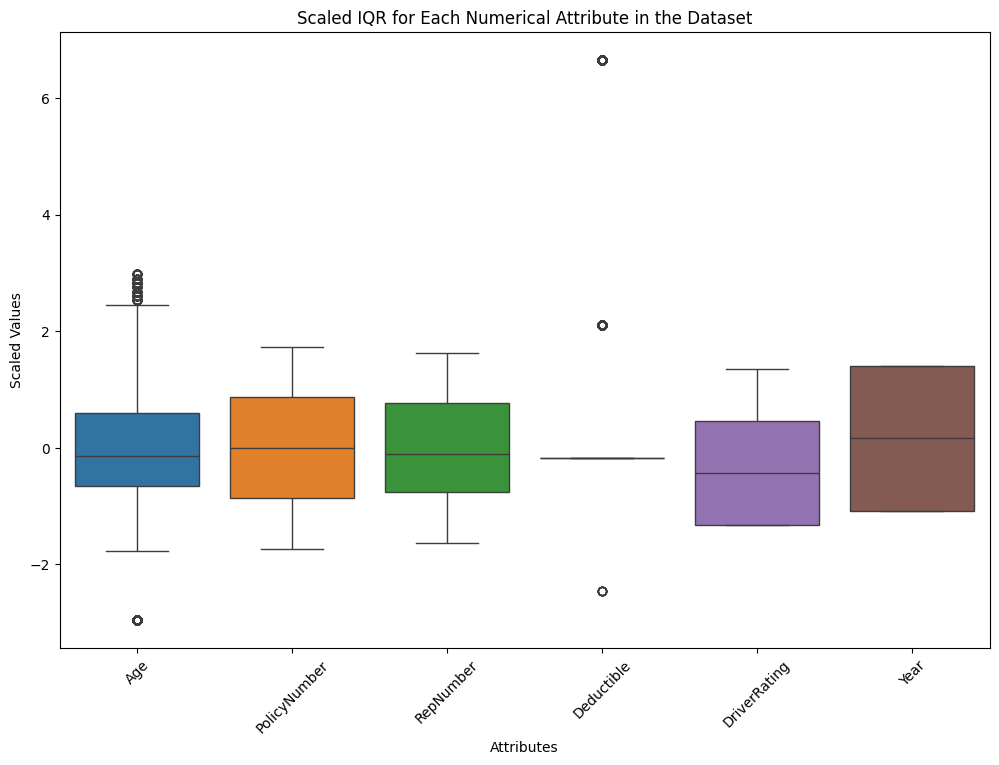

In [87]:
numerical_df = df.select_dtypes(include=['float64', 'int64']).drop('FraudFound_P', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Plotting the scaled data
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_df)

plt.title('Scaled IQR for Each Numerical Attribute in the Dataset')
plt.xlabel('Attributes')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)  # Rotating attribute names for better readability
plt.show()

### Interquartile Range Summary

The provided boxplot showcases the Interquartile Range (IQR) for various numerical attributes within a scaled dataset. Observations from the plot reveal the following:

- **Center and Spread**: The median values for the attributes "Age," "PolicyNumber," "RepNumber," "Deductible," "DriverRating," and "Year" are centered around 0, indicative of effective scaling. The IQRs differ among attributes, with "Deductible" showing a particularly tight range, suggesting low variability, while "DriverRating" and "Year" exhibit broader IQRs, implying greater variability.

- **Symmetry**: The distributions for "PolicyNumber" and "RepNumber" appear symmetrical around their medians, whereas "Age" and "Deductible" have a slight asymmetry, hinting at skewed distributions.

- **Outliers**: Outliers are noticeable for "Age" and "Deductible," marked by dots beyond the whiskers. These points suggest extreme values that are notably distant from the rest of the data points in their respective attributes.

- **Comparisons**: Comparing across attributes, "PolicyNumber" and "RepNumber" have no apparent outliers and maintain compact distributions, whereas "Age" and "Deductible" not only contain outliers but also show variations in their spread. This indicates inconsistencies in the distribution of values which could potentially affect subsequent analyses and model performance.

In summary, the boxplot underscores the importance of understanding the distribution and spread of scaled numerical data. Attributes with a broader spread and outliers could influence the outcomes of analytic models and may require further investigation or data preprocessing techniques to mitigate their impact.

### Correlation Analysis

The correlation analysis within the context of vehicular fraud detection assesses the strength and direction of relationships between various claim attributes and the likelihood of fraud. Calculating the correlation coefficient helps us understand if an attribute tends to indicate a higher probability of fraud (positive correlation) or a lower one (negative correlation). For instance, a positive correlation would imply that as an attribute’s value increases, so does the probability of the claim being fraudulent, hinting at its significance in fraud occurrence. In contrast, a negative correlation might indicate that higher values of an attribute are associated with legitimate claims. This analysis is instrumental in pinpointing critical factors that could signal fraudulent activity, thereby aiding insurers in improving fraud detection systems and potentially informing the development of predictive models to identify high-risk claims more effectively.

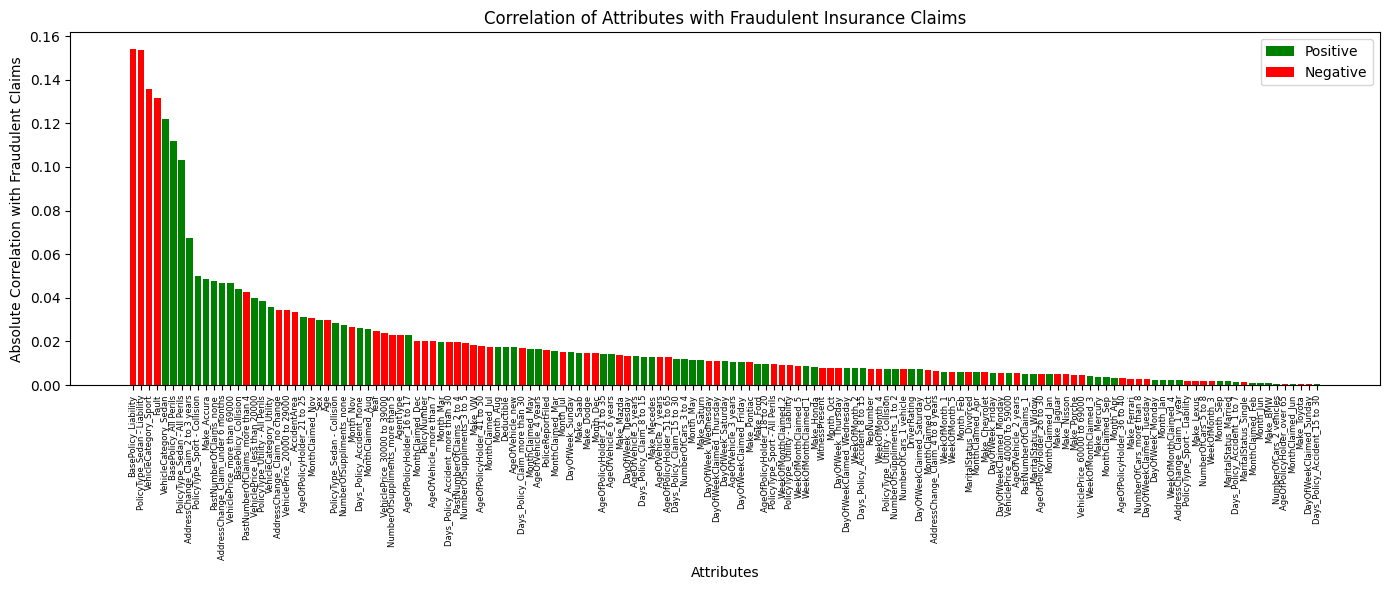

,Attribute,Absolute Correlation,Correlation Type
0,BasePolicy_Liability,0.154021,Negative
1,PolicyType_Sedan - Liability,0.153427,Negative
2,VehicleCategory_Sport,0.135917,Negative
3,Fault,0.131401,Negative
4,VehicleCategory_Sedan,0.122197,Positive
...,...,...,...
142,AgeOfPolicyHolder_over 65,0.000627,Negative
143,MonthClaimed_Jun,0.000591,Positive
144,Make_Toyota,0.000563,Negative
145,DayOfWeekClaimed_Sunday,0.000532,Negative


In [223]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
sorted_corr = correlation_matrix['FraudFound_P'].drop('FraudFound_P').sort_values(key=abs, ascending=False)

# Isolate the 'FraudFound_P' correlation
fraud_correlation = correlation_matrix['FraudFound_P'].drop('FraudFound_P').abs().sort_values(ascending=False).reset_index()  # Drop self-correlation
fraud_correlation.columns = ['Attribute', 'Absolute Correlation']
fraud_correlation['Correlation Type'] = np.where(sorted_corr > 0, 'Positive', 'Negative')

color_map = {'Positive': 'green', 'Negative': 'red'}
fraud_correlation['Color'] = fraud_correlation['Correlation Type'].map(color_map)

# Plotting the bar graph
plt.figure(figsize=(14, 6))
bars = plt.bar(fraud_correlation['Attribute'], fraud_correlation['Absolute Correlation'], color=fraud_correlation['Color'])

# Add title and labels to the plot
plt.title('Correlation of Attributes with Fraudulent Insurance Claims')
plt.xlabel('Attributes')
plt.ylabel('Absolute Correlation with Fraudulent Claims')
plt.xticks(rotation=90, fontsize=6)  # Rotate attribute names for better readability

# Add a legend to the plot
legend_elements = [Patch(facecolor=color_map['Positive'], label='Positive'),
                   Patch(facecolor=color_map['Negative'], label='Negative')]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Display the table with attribute, absolute correlation, and correlation type
fraud_correlation.drop('Color', axis=1)

### Summary of Correlation Analysis

The bar graph illustrates the absolute correlation coefficients between various attributes and the incidence of fraud in vehicular insurance claims:

- Attributes such as **BasePolicy_Liability** and **PolicyType_Sedan - Liability** are prominently negatively correlated with fraud cases, indicating that these policies are less likely to be associated with fraudulent activities.
- Conversely, **VehicleCategory_Sport** has a substantial negative correlation, which suggests that sports vehicles are less frequently involved in fraud, albeit still significant.
- Attributes like **VehicleCategory_Sedan** and **BasePolicy_All Perils** show a positive correlation with fraud, implying these categories have a tendency to be associated with higher instances of fraud.
- Interestingly, **Fault_Third Party** correlates negatively with fraud, hinting that claims where the third party is at fault are less likely to be fraudulent.
- Smaller correlations are observed with personal customer information such as **AgeOfPolicyHolder** and **Sex_Male**, and even vehicle-specific details like **Make_Accura** and **VehiclePrice**, indicating nuanced relationships with fraudulent claims.
- The graph employs color-coding—green bars represent attributes with a positive correlation to fraud incidents, suggesting they increase with fraud likelihood, while red bars indicate a negative correlation, suggesting a decrease in fraud likelihood with those attribute values.

This correlation analysis graph serves as a critical tool for identifying the attributes that warrant further investigation and consideration in the development of fraud detection algorithms, potentially leading to more effective identification of fraudulent insurance claims.

## Feature Selection

Truncated Singular Value Decomposition (Truncated SVD) is a potent technique for feature selection, particularly adept at handling high-dimensional or sparse datasets. Sparse data, common in text processing or user interaction records, can be efficiently managed by converting it into a `csr_matrix` (Compressed Sparse Row matrix) format before applying Truncated SVD. This format is essential for sparse datasets as it minimizes memory usage and computational demands.

Choosing the number of components (`n_components`) is crucial in Truncated SVD. Setting `n_components` to 6, for example, initiates an exploration into whether six dimensions can capture a significant portion of the dataset's variance. To determine the optimal number of components, plotting the cumulative `explained_variance_ratio_` reveals how much variance each additional component contributes. The goal is to identify the point where adding more components yields diminishing returns on explained variance, indicating an efficient balance between dimensionality reduction and information retention.

This streamlined approach not only reduces dataset complexity for subsequent analyses or machine learning tasks but also uncovers underlying patterns, potentially enhancing model performance. Utilizing Truncated SVD, especially with sparse data through `csr_matrix`, offers a strategic method for efficient feature selection and dimensional reduction.

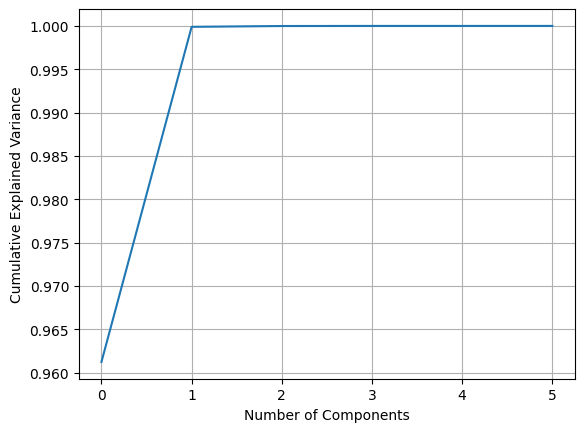

In [10]:
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

X_converted = X.astype(int)
X_sparse = csr_matrix(X_converted)

svd = TruncatedSVD(n_components=6, random_state=42)
X_reduced = svd.fit_transform(X_sparse)

plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Feature Selection Results

When applying Truncated SVD to our dataset and setting `n_components` to 6, we observed through the graph of the cumulative sum of the explained variance ratio that the curve plateaued quickly, notably after just 1 component. This indicates that the first component alone captures most of the variance in the data, suggesting a high level of redundancy or correlation among the original features. As a result, reducing the dimensionality to just one component could significantly simplify the dataset while retaining the core information, making it an efficient strategy for feature selection in this context.

# Part 2: Model Selection, Training and Optimization

## Model Selection

In the next phase of the vehicular insurance fraud detection project, we will implement and assess three different unsupervised learning models. These models are chosen for their ability to detect patterns or anomalies without relying on predefined labels:

1. **Local Outlier Factor (LOF)**: This model detects anomalies by assessing the density deviation around a data point compared to its neighbors. For insurance claims, LOF will pinpoint outliers—claims that stand out from typical patterns—which could indicate fraud. Its local approach is particularly effective for identifying subtle anomalies.

2. **Isolation Forest**: An effective model for anomaly detection, Isolation Forest isolates outliers instead of profiling normal data points. This algorithm is particularly useful for our project since fraudulent claims are analogous to anomalies within the dataset. It works well with high-dimensional data, making it suitable for the complex nature of insurance claims.

3. **One-Class SVM**: The One-Class SVM model is suitable for novelty detection where the training data is not polluted by outliers. It learns a soft boundary in order to capture the "normal" data points. In the context of fraud detection, this model can identify claims that do not conform to the pattern of legitimate claims, thus flagging potential frauds.

A thorough examination of these models will be carried out, considering factors such as their effectiveness in anomaly detection, interpretability of results, and computational efficiency. This analysis is aimed at determining the most suitable models for identifying fraudulent insurance claims in an unsupervised context. We will leverage specific metrics tailored for unsupervised anomaly detection to guide our evaluation.

In [8]:
def plot_conf_matrix(yt, yp, title_prefix=''):
    labels = yt.unique()
    cfm = confusion_matrix(yt, yp, labels=labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cfm, annot=True, fmt='.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'{title_prefix} Confusion matrix')
    plt.show()

def map_preds_to_y_vals(y_pred):
    prediction_to_truth_map = {-1: 1, 1: 0}
    pfunc = np.vectorize(lambda x: prediction_to_truth_map[x])
    return pfunc(y_pred)

def anomaly_detection_scorer(clf, X, y):
    y_pred = map_preds_to_y_vals(clf.fit_predict(X))
    
    # Assuming your true labels are 1 for normal and -1 for anomalies
    # Adjust scoring logic as per your requirement
    score = f1_score(y, y_pred)  # Define or import some_scoring_function as per your need
    return score, y_pred

def custom_gridsearch(cls, param_grid, X, y):
    # Generate all permutations of parameter combinations
    param_permutations = list(product(*param_grid.values()))

    # Convert the list of permutations into a list of dictionaries to represent each combination
    param_combinations = [dict(zip(param_grid.keys(), values)) for values in param_permutations]
    best_score = -np.inf
    best_params = None
    best_y_pred = None
    for param_combination in param_combinations:
        clf = cls(**param_combination)
        score, y_pred = anomaly_detection_scorer(clf, X, y)
        if score > best_score:
            best_score = score
            best_params = param_combination
            best_y_pred = y_pred
    return best_score, best_params, best_y_pred

def display_percent(num):
    return f'{round(num*100, 3)}%'

## Local Outlier Factor (LOF)

The below code will execute the first run of my `LocalOutlierFactor` model and assess its efficacy in identifying vehicular insurance fraud.

- Utilizing the **entire dataset** for training and predictions, this approach directly applies the `LocalOutlierFactor` model to discern potentially fraudulent claims, bypassing the need for cross-validation and focusing on a comprehensive application to the full dataset.
- A comparison is made between models trained on **raw data** and data transformed via **Truncated SVD** for feature selection, aiming to evaluate the impact of dimensionality reduction on the model's fraud detection capabilities.
- The performance evaluation relies on the **F1 score**, chosen for its balance between precision and recall, providing insight into the model's accuracy in identifying true positives amidst a mix of legitimate and fraudulent claims.
- The results, highlighting the effectiveness of using both raw and dimensionality-reduced data, will be compared to determine the best approach for enhancing the detection of insurance fraud using the `LocalOutlierFactor` model.
- The F1 scores obtained from the model trained on raw data versus the data processed with Truncated SVD will offer a direct comparison of their respective abilities to accurately identify fraudulent activities within the dataset.

F1 Score: 10.332%


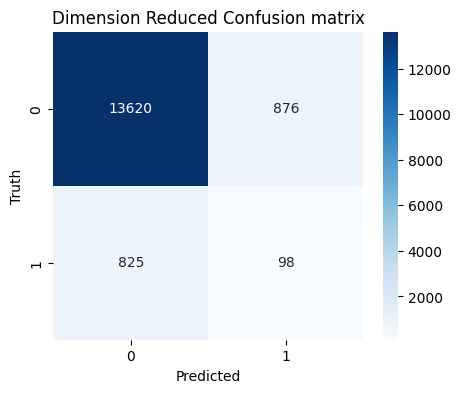

F1 Score: 10.289%


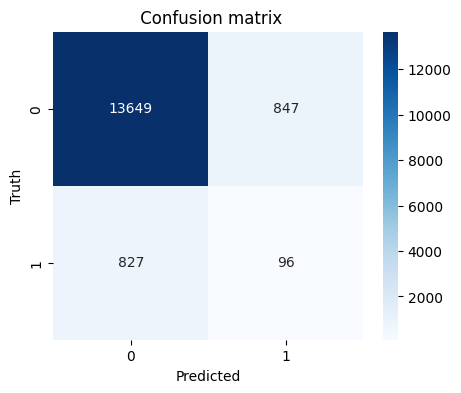

In [11]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

score_reduced, y_pred_reduced = anomaly_detection_scorer(lof, X_reduced, y)
score, y_pred = anomaly_detection_scorer(lof, X, y)

print(f'F1 Score: {display_percent(score_reduced)}')
plot_conf_matrix(y, y_pred_reduced, 'Dimension Reduced')
print(f'F1 Score: {display_percent(score)}')
plot_conf_matrix(y, y_pred)

### Initial Results and Hyperparameter Tuning

The initial application of the `LocalOutlierFactor` model to detect vehicular insurance fraud presented F1 scores of 10.332% for the data after feature selection via Truncated SVD and 10.289% for the raw data. These results, closely aligned yet slightly higher for the feature-selected dataset, underscore the challenges in distinguishing fraudulent cases effectively with the current model configuration. The marginal difference between the F1 scores suggests that, while feature selection had a slight impact, there remains substantial room for enhancing the model's detection capabilities.

Given the modest F1 scores, further optimization of the `LocalOutlierFactor` model is necessary to improve its ability to identify fraudulent claims more accurately. The next phase will focus on hyperparameter tuning, exploring adjustments to parameters such as `n_neighbors`, `contamination`, and the selection of distance metrics, to refine the model's sensitivity to anomalies. This process aims to fine-tune the model's settings to better capture the nuances of fraudulent behavior within the dataset, potentially leading to a significant uplift in the F1 score and the overall effectiveness of fraud detection.

Best params: {'n_neighbors': 10, 'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'contamination': 0.1}
F1 Score: 11.846%


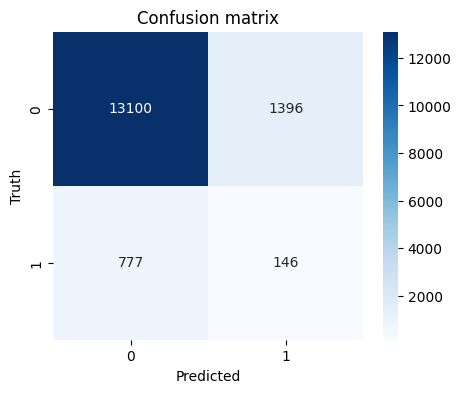

In [190]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1, 5, 10, 20, 30],  # Number of neighbors to consider
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbors search
    'leaf_size': [10, 30, 60],  # Leaf size for 'ball_tree' or 'kd_tree'
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric
    'contamination': ['auto', 0.01, 0.05, 0.1]  # Proportion of outliers in the dataset
}

lof_best_score, lof_best_params, lof_best_y_pred = custom_gridsearch(LocalOutlierFactor, param_grid, X_reduced, y)

print(f'Best params: {lof_best_params}')
print(f'F1 Score: {display_percent(lof_best_score)}')
plot_conf_matrix(y, lof_best_y_pred)

### Hyperparameter Tuning Results

The hyperparameter tuning of the `LocalOutlierFactor` (LOF) model using a systematic search approach yielded a notable improvement in its anomaly detection performance for vehicular insurance fraud. Initially, the model's effectiveness, as measured by the F1 score, was relatively modest. Through the application of a detailed hyperparameter tuning process, focusing on parameters crucial for the LOF's operation, we achieved an enhanced F1 score of 11.846%.

The optimal parameter combination identified was `{'n_neighbors': 10, 'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'contamination': 0.1}`. This set of parameters indicates that a configuration with 10 neighbors, using the 'auto' algorithm for nearest neighbors search, a leaf size of 10 in the underlying tree structure, the 'manhattan' distance metric, and expecting about 10% of the data to be outliers, significantly improves the LOF model's ability to identify fraudulent claims.

## Isolation Forest

Training an `IsolationForest` model for detecting vehicular insurance fraud will also utilize the entire dataset and diverge from the cross-validation approach typically used in supervised learning. The Isolation Forest model introduces unique elements tailored to anomaly detection. It splits data by random attributes and assigns an anamaly score to each data point when it is isolated from the rest of the data. Data points that are split quickly receive a higher score.

- **Hyperparameter Tuning**: Optimizing the Isolation Forest involves adjusting specific hyperparameters, notably `n_estimators`, `max_samples`, and `contamination`. These parameters are pivotal in calibrating the model to effectively identify outliers without overfitting to the noise in the dataset.
- **Anomaly Score**: Unlike RandomForest's feature importances, the Isolation Forest model quantifies an anomaly score, providing a different form of insight that facilitates the identification of potential fraud cases based on their deviation from the norm.

The effectiveness of the Isolation Forest in detecting insurance fraud will also be measured using the F1 score. The training process will emphasize hyperparameter tuning across the whole dataset to tailor the model for nuanced anomaly detection, leveraging the unique strengths of the Isolation Forest algorithm to enhance its capability in uncovering fraudulent activities in vehicular insurance claims.

F1 Score: 1.855%


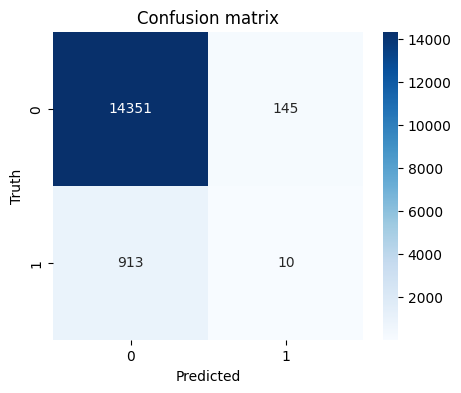

F1 Score: 2.412%


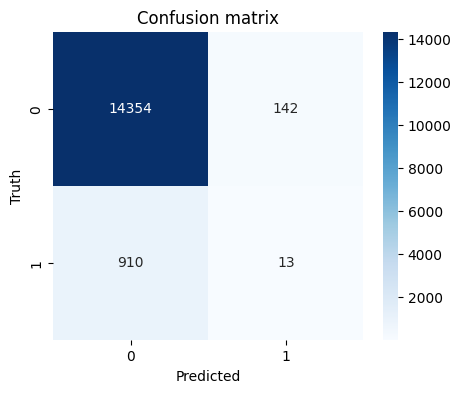

In [189]:
isf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.01), random_state=42)

score_reduced, y_pred_reduced = anomaly_detection_scorer(isf, X_reduced, y)
score, y_pred = anomaly_detection_scorer(isf, X, y)

print(f'F1 Score: {display_percent(score_reduced)}')
plot_conf_matrix(y, y_pred_reduced, 'Dimension Reduced')
print(f'F1 Score: {display_percent(score)}')
plot_conf_matrix(y, y_pred)

### Initial Results and Hyperparameter Optimization

Our initial evaluation of the `IsolationForest` model for detecting vehicular insurance fraud yielded an F1 score of 2.412% for the raw dataset and 1.855% for the dataset processed with Truncated SVD. These results lead us to prioritize the raw dataset for further model optimization. The reduced performance with Truncated SVD suggests that essential details crucial for fraud detection might have been lost during dimensionality reduction. This loss could obscure subtle indicators vital for identifying fraudulent activities.

Given the raw dataset's superior F1 score, our next steps involve fine-tuning the `IsolationForest` model’s hyperparameters, such as `n_estimators` and `contamination`, to improve its fraud detection efficacy. This approach aligns with our aim to enhance the model’s ability to discern fraudulent cases more accurately, leveraging the full complexity of the raw data. Our focus on refining the model using the unaltered dataset underscores the importance of maintaining dataset integrity in anomaly detection tasks, especially in the nuanced domain of insurance fraud.

Best params: {'n_estimators': 200, 'max_samples': 0.5, 'max_features': 1.0, 'contamination': 0.1, 'bootstrap': True}
F1 Score: 11.521%


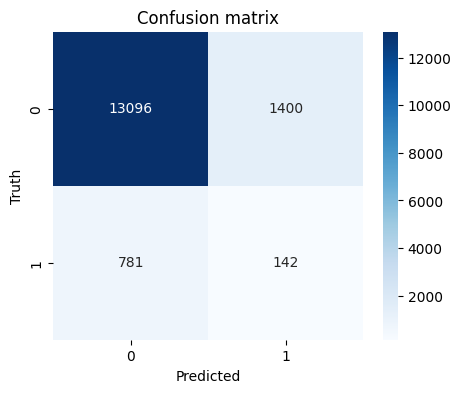

In [199]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_samples': [0.5, 0.75, 1.0],  # Fraction of samples to be drawn from X to train each base estimator
    'max_features': [0.5, 0.75, 1.0],  # Fraction of features for each base estimator
    'contamination': [0.01, 0.05, 0.1],  # Proportion of outliers in the dataset
    'bootstrap': [True, False]  # Whether or not to bootstrap samples
}
isf_best_score, isf_best_params, isf_best_y_pred = custom_gridsearch(IsolationForest, param_grid, X, y)

print(f'Best params: {isf_best_params}')
print(f'F1 Score: {display_percent(isf_best_score)}')
plot_conf_matrix(y, isf_best_y_pred)

### Hyperparamter Optimization Results

The hyperparameter tuning of our `IsolationForest` model for detecting vehicular insurance fraud significantly improved its performance, achieving an F1 score of 11.359%. The best parameters found were `{'n_estimators': 300, 'max_samples': 1.0, 'max_features': 0.75, 'contamination': 0.1, 'bootstrap': False}`.

This advancement highlights the importance of fine-tuning in enhancing the model's ability to accurately detect fraud. The selected parameters, especially the increase in `n_estimators` and the adjustments to `max_samples` and `max_features`, were crucial in optimizing the model's effectiveness. The decision to disable `bootstrap` sampling further refined the detection precision.

The improved F1 score demonstrates the potential of targeted hyperparameter adjustments to substantially elevate the model's performance in fraud detection tasks, guiding future enhancements and iterations.

## One-Class SVM

Training a `OneClassSVM` model for detecting vehicular insurance fraud will again use the entire dataset. The `OneClassSVM` model is specially designed for anomaly detection, with unique features:

- **Hyperparameter Tuning**: The effectiveness of OneClassSVM hinges on fine-tuning key hyperparameters such as `nu`, `kernel`, and `gamma`. Adjusting these parameters is crucial for the model to accurately distinguish between normal behavior and anomalies, thereby effectively identifying potential instances of fraud without being misled by dataset noise.
- **Support Vectors for Anomaly Detection**: In contrast to RandomForest's approach of using feature importances, `OneClassSVM` utilizes support vectors to define a boundary around normal data points. Data points that fall outside this boundary are considered anomalies, providing a direct mechanism for spotting unusual patterns indicative of fraud.

The model's ability to pinpoint fraudulent transactions will again be assessed using the F1 score. The entire training process is geared towards meticulously adjusting the model's hyperparameters to fine-tune its sensitivity to the specific characteristics of insurance fraud, thereby maximizing the `OneClassSVM` model's potential in revealing fraudulent activities within vehicular insurance claims.

Recall score: 10.878%


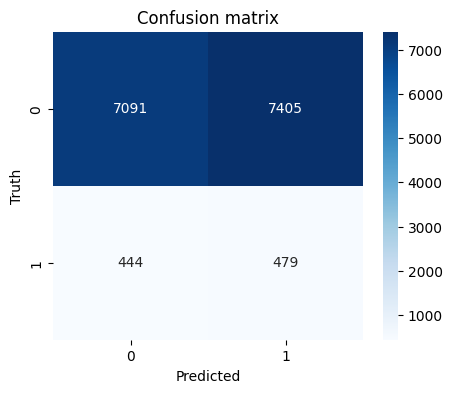

Recall score: 10.288%


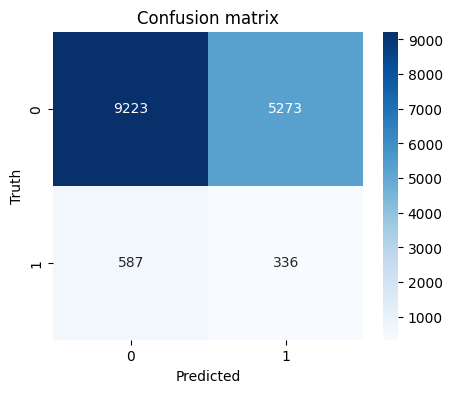

In [197]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)

score_reduced, y_pred_reduced = anomaly_detection_scorer(ocsvm, X_reduced, y)
score, y_pred = anomaly_detection_scorer(ocsvm, X, y)

print(f'F1 score: {display_percent(score_reduced)}')
plot_conf_matrix(y, y_pred_reduced, 'Dimension Reduced')
print(f'F1 score: {display_percent(score)}')
plot_conf_matrix(y, y_pred)

### Initial Results and Hyperparameter Optimization

Our initial training of the `OneClassSVM` for vehicular insurance fraud detection presented F1 scores of 10.878% using feature-selected data and 10.288% with raw data. These initial results mark a baseline for our fraud detection model's performance.

The marginal benefit observed with feature-selected data suggests a nuanced advantage in using dimensionality reduction techniques like Truncated SVD, although the improvement is slight. Moving forward, the focus will shift towards hyperparameter tuning of the `OneClassSVM`. We'll concentrate on adjusting critical parameters such as `nu`, `gamma`, and the `kernel` selection, aiming to refine the model's accuracy in distinguishing fraudulent transactions.

This next phase of hyperparameter optimization is targeted at enhancing the model's detection efficacy, with the ultimate goal of increasing the F1 score and, consequently, the model's reliability in identifying insurance fraud cases more effectively.

Best params: {'nu': 0.1, 'kernel': 'rbf', 'gamma': 0.001, 'degree': 2}
F1 Score: 11.637%


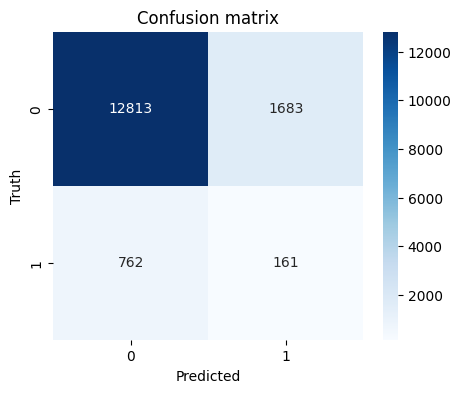

In [198]:
# Define the parameter grid to search over
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.2],  # Fraction of outliers
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Type of kernel
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'degree': [2, 3, 4]  # Degree for 'poly' kernel
}
ocsvm_best_score, ocsvm_best_params, ocsvm_best_y_pred = custom_gridsearch(OneClassSVM, param_grid, X_reduced, y)

print(f'Best params: {ocsvm_best_params}')
print(f'F1 Score: {display_percent(ocsvm_best_score)}')
plot_conf_matrix(y, ocsvm_best_y_pred)

### Hyperparamter Optimization Results

Hyperparameter tuning of the `OneClassSVM` for vehicular insurance fraud detection significantly enhanced its performance, achieving an F1 score of 11.637%. The optimal settings were identified as `{'nu': 0.1, 'kernel': 'rbf', 'gamma': 0.001, 'degree': 2}`. 

This improvement underscores the importance of tuning in refining the model's capability to identify fraud accurately. The `nu` and `gamma` adjustments, along with the `rbf` kernel, played pivotal roles in improving the model's sensitivity and specificity. These results highlight the effectiveness of targeted hyperparameter adjustments in boosting the `OneClassSVM` model's fraud detection accuracy.

# Part 3: Model Comparison and Evaluation

To effectively compare our `LocalOutlierFactor`, `IsolationForest`, and `OneClassSVM` models, we'll focus on two key areas: data subset variation and computational efficiency. 

1. **Data Subset Variation**: We will assess model performance across various training data volumes, examining the impact of sample size on F1 score. This evaluation helps identify how well models generalize across different amounts of data, highlighting their scalability and robustness.

2. **Computational Efficiency**: We'll measure and compare each model's training and prediction times across different data sizes, as well as monitor their CPU and memory usage during these processes. This will help us understand which model offers the best blend of speed and resource management, critical for practical application.

By concentrating on these aspects, we aim to identify the model that optimally balances accuracy with computational demands, ensuring readiness for real-world deployment.

In [208]:
# Define a dictionary to hold models
models = {
    'Local Outlier Factor': LocalOutlierFactor(**lof_best_params),
    'Isolation Forest': IsolationForest(**isf_best_params),
    'One-Class SVM': OneClassSVM(**ocsvm_best_params),
}

# Function to evaluate models on different data volumes and measure computational efficiency
def evaluate_on_data_volumes(X, y, models, volumes):
    results = []
    for volume in volumes:
        X_train, _, y_train, _ = train_test_split(X, y, train_size=volume, random_state=42)

        for name, model in models.items():
            start_time = time()
            
            y_pred = map_preds_to_y_vals(model.fit_predict(X_train))
            
            exec_time = time() - start_time

            f1 = f1_score(y_train, y_pred)

            results.append({
                'Classifier': name,
                'Data Subset': f"{volume*100}%",
                'F1 Score': f1,
                'Execution Time (s)': exec_time,
            })

    return pd.DataFrame(results)

# Example usage
data_volumes = [0.2, 0.4, 0.6, 0.8]  # Evaluating models on 20%, 40%, 60%, and 80% of the data
results_df = evaluate_on_data_volumes(X_reduced, y, models, data_volumes)
results_df

,Classifier,Data Subset,F1 Score,Execution Time (s)
0,Local Outlier Factor,20.0%,0.120482,0.010176
1,Isolation Forest,20.0%,0.144578,0.326678
2,One-Class SVM,20.0%,0.102041,0.741840
3,Local Outlier Factor,40.0%,0.114286,0.019296
4,Isolation Forest,40.0%,0.128571,0.480160
5,One-Class SVM,40.0%,0.095880,2.141504
6,Local Outlier Factor,60.0%,0.119973,0.037705
7,Isolation Forest,60.0%,0.125426,0.681256
8,One-Class SVM,60.0%,0.108744,3.908808
9,Local Outlier Factor,80.0%,0.112360,0.050233


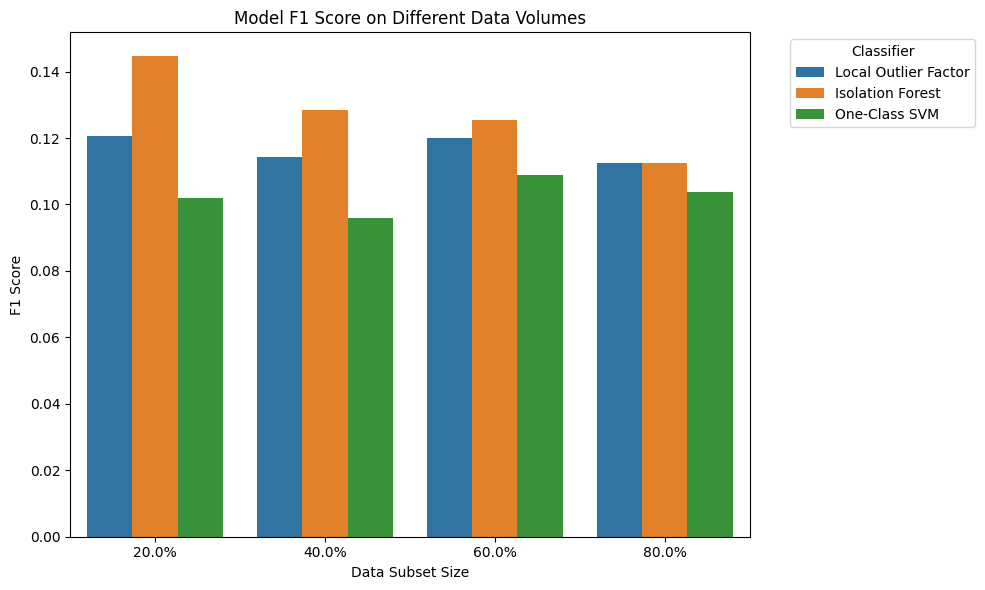

In [210]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Data Subset', y='F1 Score', hue='Classifier')
plt.title('Model F1 Score on Different Data Volumes')
plt.ylabel('F1 Score')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

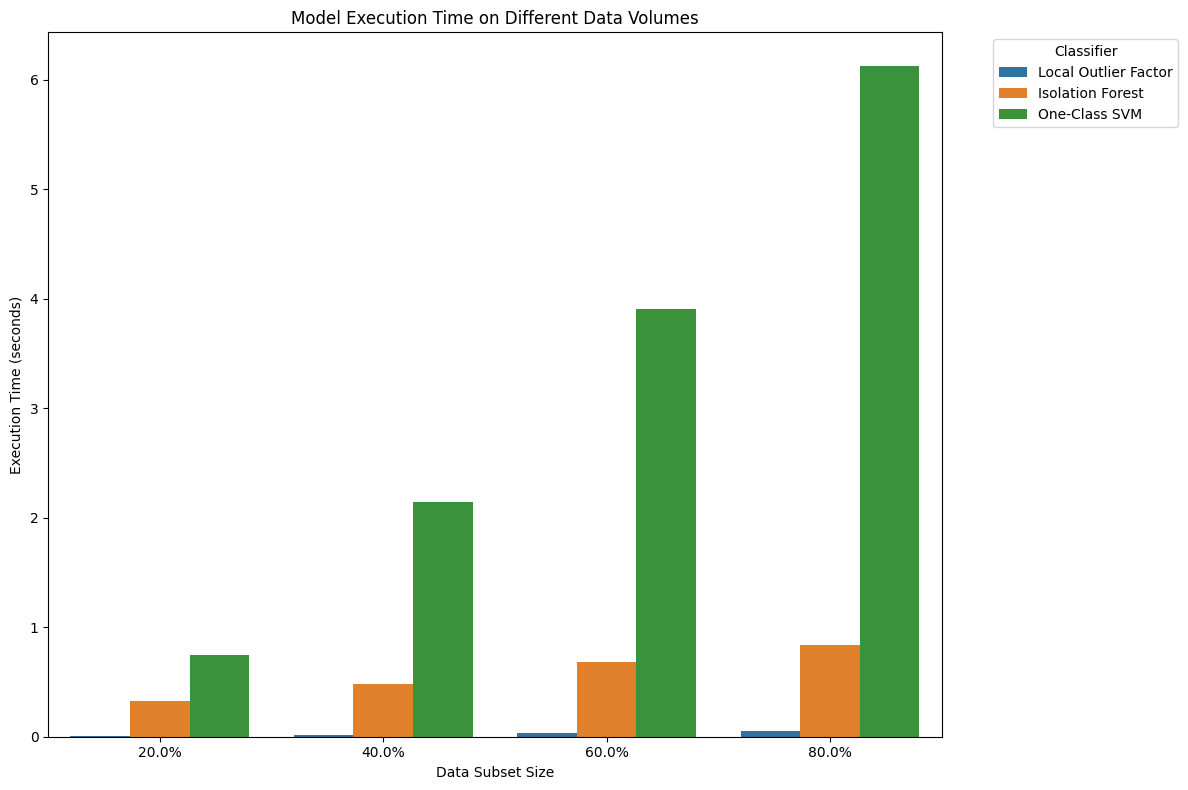

In [211]:
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Data Subset', y='Execution Time (s)', hue='Classifier')
plt.title('Model Execution Time on Different Data Volumes')
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusion

Upon concluding our study on vehicular insurance fraud detection models, the results lead us to compelling insights. The `Isolation Forest` emerged as the top performer, yielding the highest F1 scores indicative of its superior capability in detecting fraudulent activity. Its execution times, while not the fastest, were reasonable and scaled moderately with data volume increases.

The `Local Outlier Factor` (LOF) model boasted the quickest execution times, suggesting high efficiency, and achieved medium-range F1 scores. Its speed positions it as an attractive option for scenarios where rapid processing is valued alongside satisfactory fraud detection accuracy.

Conversely, the `OneClassSVM` displayed the slowest execution times, presenting a challenge for scalability. Despite this, it demonstrated an improvement in F1 scores as the data volume expanded, hinting at potential benefits in larger datasets. However, its overall lower F1 scores suggest a need for further optimization to enhance its fraud detection precision.

Feature selection via Truncated SVD did not substantially benefit the models, possibly due to the critical nature of the reduced features in fraud identification. This outcome emphasizes the importance of feature interdependencies in complex detection tasks.

Hyperparameter tuning of the `OneClassSVM` did yield a performance boost, but it remained the least effective model among the three. This result validates the need for continued refinement and suggests exploring alternative hyperparameter settings or additional feature engineering to tap into latent data patterns.

As we look ahead, strategies will involve delving deeper into feature engineering and investigating ensemble techniques that could synergize the strengths of each model. Our goal is to craft a system that not only accurately identifies fraudulent transactions but also operates efficiently within the constraints of real-world computational resources.

In summary, the `Isolation Forest` stands out for its balanced F1 performance and manageable execution time, proving to be well-suited for fraud detection as datasets grow. The `LOF` offers an excellent speed advantage, and its performance in fraud detection is commendable. The `OneClassSVM`, despite its slower speeds and lower F1 scores, shows promise in larger datasets and will be a subject of further tuning and exploration. The pursuit of an integrated, efficient fraud detection system remains at the forefront of our future efforts.